# K-Means example for salary and experience

---

In [2]:
# For avoiding memory leak when working with K-means
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [3]:
import pandas as pd
import matplotlib.pyplot as plot
import sklearn.cluster as skl

In [4]:
#Adquiere los datos desde un archivo csv usando biblioteca PANDAS
dataframe = pd.read_csv('salarios-pedagogo-experiencia.csv', encoding='ISO-8859-1')
x = dataframe['salario']
y = dataframe['experiencia']
dataframe

,empleado,salario,experiencia
0,ESAU GADIEL RIOS,9.96,1.00
1,ISAAC CORTES,13.33,2.00
2,JESUS CERNA,12.50,2.25
3,MARIANA YANABETH MARTINEZ,12.47,2.50
4,DAVID JOACIM GOMEZ,12.21,2.50
5,JOSHUA ALDANA,12.00,2.00
6,ESDRAS ALDAIR MARTINEZ,11.98,2.00
7,SANTIAGO FIGUEROA,11.94,1.50
8,JOSÉ YOSAFAT ZAVALETA,11.84,1.75
9,IVAN ARMANDO VAZQUEZ,11.83,2.00


In [4]:
#Tomamos únicamente las características x,y para el set de entrenamiento
X = pd.DataFrame()
X['x'] = x
X['y'] = y

In [5]:

#Solicita al usuario el número de Clusters - Parámetro K
k = int(input("Indique el número de clusters k: "))

Indique el número de clusters k: 5


In [6]:
#Inicialización para algoritmo de clustering con el parámetro K indicado por el usuario
kmeansModel = skl.KMeans(n_clusters=k)

In [7]:
#Carga los datos
kmeansModel.fit(X)


KMeans(n_clusters=5)

In [8]:
#Obtiene los centroides
centroides = kmeansModel.cluster_centers_

In [9]:
#Obtiene una lista con las etiquetas de los datos
etiquetas = kmeansModel.predict(X)

In [10]:

#Agrega al frame de datos una columna para las etiquetas de clasificación
dataframe['etiquetas'] = etiquetas


In [11]:
#Tabla de colores
colores =['red','orange','green','pink','blue'] 

colores_datos=[]
colores_centroides=[]

for row in etiquetas:
    colores_datos.append(colores[row])

for i in range(len(centroides)):
    colores_centroides.append(colores[i])


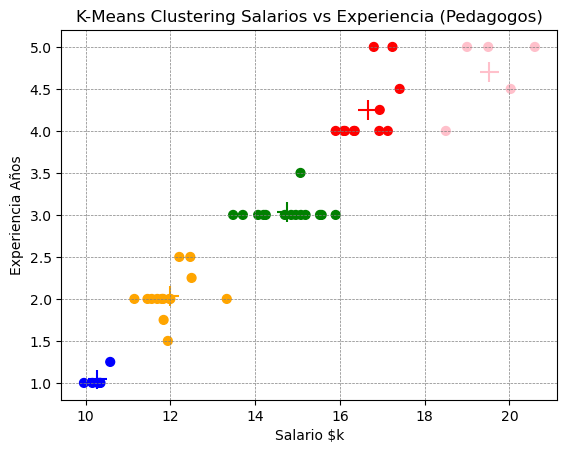

In [12]:
#Grafica de dispersión
ax = plot.axes()
ax.scatter(x, y, c=colores_datos, marker='o', s=40)
ax.scatter(centroides[:,0], centroides[:,1], c=colores_centroides, marker='+', s=200)
plot.xlabel('Salario $k')
plot.ylabel('Experiencia Años')
plot.title('K-Means Clustering Salarios vs Experiencia (Pedagogos)')
plot.grid(color='gray', linestyle='--', linewidth = 0.5)
plot.show()

dataframe.to_csv('salarios-agupados.csv', encoding='ISO-8859-1')